# RESEARCH QESTIONS

## Exploratory Data Analysis

# RQ 1

In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

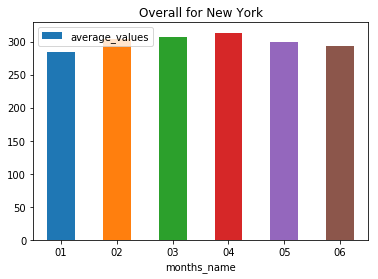

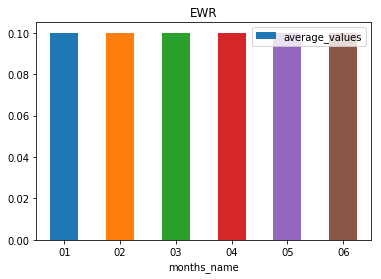

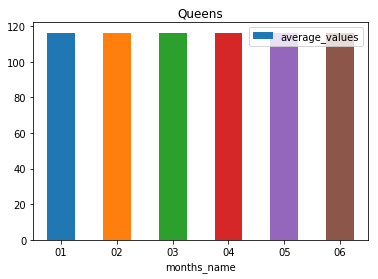

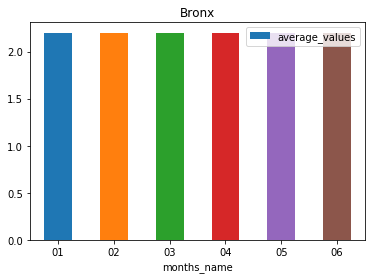

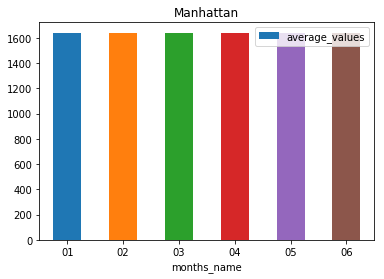

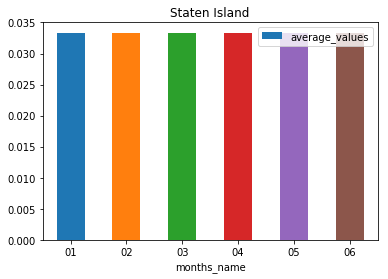

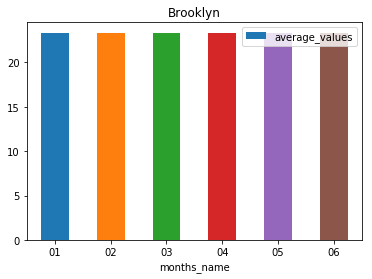

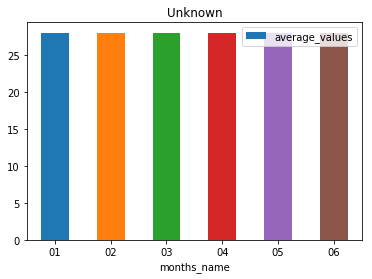

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
from sqlalchemy import create_engine
import os as os
from datetime import datetime
import traceback
%matplotlib inline

#classes this will be on seperate file
class EachMonthTrips:
    totalTrips = 0
    average_of_each_day = 0
    total_number_days_in_month=0
    each_day_total_trips = {}
    total_boroughs_trips = {}
    total_boroughs_trips_average = {}
    
    

#filesname variables
yellow_tripdata_2018 = 'yellow_tripdata_2018'
taxi_zone_lookup = 'taxi_zone_lookup.csv'

#This function will generate the chunk and yeild it where it is demanded
def chunck_generator(filename, header=False,chunk_size = 10 ** 5): # notice the default value for chunk_size and header
    for chunk in pd.read_csv(filename,delimiter=',', iterator=True, chunksize=chunk_size, parse_dates=[1] ): 
        yield (chunk)
        
#This function will also used for generating the chunk but it will yeild out the single row which being used for calculation
def _generator( filename, header=False,chunk_size = 10 ** 5): # notice the default value for chunk_size and header
    chunk = chunck_generator(filename, header=False,chunk_size = 10 ** 5)
    for row in chunk: #go over the chunk file and loop through rows and yeild them
        yield row

#This function will be used to read zone_lookup file
def read_full_csv_file(zone_lookup):
    df = pd.read_csv(zone_lookup)
    return df 


#combinning the data with zone    
def combine_file_with_zone(tripdata_filename, zone_lookup, list_of_months):
    filename = tripdata_filename
    generator = _generator(filename=filename)
    
    continue_iteration = True # this will make iteration to stop
    
            
    index=0;      
    while continue_iteration:
        try:
#             if(index == 1):
#                 break
            yellow_tripdata_chunk = next(generator)
            taxi_zone_data_set = read_full_csv_file(taxi_zone_lookup)
            if isinstance(yellow_tripdata_chunk, pd.DataFrame) and isinstance(taxi_zone_data_set, pd.DataFrame):
                combined_data_set = pd.merge(yellow_tripdata_chunk[:100], taxi_zone_data_set, on= None, left_on = 'PULocationID', right_on = 'LocationID')
                 #finding answers

            for index, row in combined_data_set.iterrows(): # iterating through dataframe
                date = row["tpep_pickup_datetime"] # It is already in DateTime format. Great!
                month_name = '%02d' % date.month #getting month name
                day_name = '%02d' % date.day
                try:
                    list_of_months[month_name].totalTrips = list_of_months[month_name].totalTrips + 1
                    list_of_months[month_name].total_boroughs_trips[row["Borough"]] = list_of_months[month_name].total_boroughs_trips[row["Borough"]] + 1
                    list_of_months[month_name].each_day_total_trips[day_name]= list_of_months[month_name].each_day_total_trips[day_name] + 1
                except Exception as e:
                    pass
                    #traceback.print_exc() #ignore month that is not between 1-6 of 2018 and days that are not followed the above limit 
        except Exception as e:
            continue_iteration=False
            pass
           # traceback.print_exc()
            #print("Iterator finished: ex:"+ str(e))
        index = index + 1
        
        
# now I am going to assume that data I have is for 2018
list_of_months = {"01":EachMonthTrips(),
                  "02":EachMonthTrips(),
                  "03":EachMonthTrips(),
                  "04":EachMonthTrips(),
                  "05":EachMonthTrips(),
                  "06":EachMonthTrips() }

#I know I can automate this process too but Just leave it for now
list_of_months["01"].total_number_days_in_month= 31
list_of_months["02"].total_number_days_in_month= 28
list_of_months["03"].total_number_days_in_month= 31
list_of_months["04"].total_number_days_in_month= 30
list_of_months["05"].total_number_days_in_month= 31
list_of_months["06"].total_number_days_in_month= 30


# assigning value to each object of list_of_months for dictionary purposes
for key, value in list_of_months.items():
    for i in range(value.total_number_days_in_month):
        day_value_in_double_digit='%02d' % i
        list_of_months[key].each_day_total_trips[day_value_in_double_digit] = 0
        
borough_df = read_full_csv_file(taxi_zone_lookup)

list_of_unqiue_boroughs = borough_df.Borough.unique() #getting and droping unknown borough

for key, value in list_of_months.items():
    for borough in list_of_unqiue_boroughs:
        list_of_months[key].total_boroughs_trips[borough] = 0

files = os.listdir(os.curdir)  #files and directories
index=0
files.reverse()
for filename in files:
    if yellow_tripdata_2018 in filename:
        combine_file_with_zone(filename,taxi_zone_lookup,list_of_months)
        index = index + 1

months_averages = list()
for key, value in list_of_months.items():
    value.average_of_each_month = value.totalTrips/value.total_number_days_in_month
    months_averages.append(value.average_of_each_month)
    for borough_name, borough_value in value.total_boroughs_trips.items():
        value.total_boroughs_trips_average[borough_name] = borough_value/value.total_number_days_in_month
        
        


data_frame_to_plot = pd.DataFrame({'months_name':list( list_of_months.keys()), 'average_values': list(months_averages)})
data_frame_to_plot.plot.bar(x='months_name', y='average_values', rot=0,title="Overall for New York")

##Now I am going to create list of Data Frame for each boruugh

average_values_for_each_borough={}

for key, value in list_of_months.items():
    for borough_name, borough_value in value.total_boroughs_trips_average.items():
        average_values_for_each_borough[borough_name]=list()

for key, value in list_of_months.items():
    for borough_name, borough_value in value.total_boroughs_trips_average.items():
        average_values_for_each_borough[borough_name].append(borough_value)


for key,value in average_values_for_each_borough.items():
    data_frame_to_plot = pd.DataFrame({'months_name':list( list_of_months.keys()), 'average_values': value})
    data_frame_to_plot.plot.bar(x='months_name', y='average_values', rot=0,title=key)

### In what period of the year Taxis are used more?

Taxi are used more in New York overall zones in April as you can see from above chart

### Create a plot that, for each month, shows the average number of trips recorded each day. 

First Graph in above example is related to showing the graph for each month as an average trips. So you can see that April has more Trips that any other.

### Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

Yes, there is huge difference among them. The Manhattan zone has very high daily average trips. Others have no more than 120 trips for each month as an average. So there is going to be Huge Trafic in Manhattan. 

The Month with highest Daily is April and do notice that above explanation is not from full set of data but only contains 100 lines from the generator chunk. It will work for whole data as well. 


# RQ 2

What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

We have decided to take into account six time-slots:
1. 06:00 to 10:00
2. 10:00 to 14:00
3. 14:00 to 18:00
4. 18:00 to 22:00
5. 22:00 to 00:00
6. 00:00 to 06:00

In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#we define a function to clean the csv in odert to have 
def preparation_df(month):
    #merge of tripdata with taxi_zone on PULocation
    date_col = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
    df = pd.read_csv('yellow_tripdata_2018-0'+str(month)+'.csv', parse_dates = date_col)
    zone = pd.read_csv('taxi_zone_lookup.csv', usecols = ['LocationID', 'Borough'])
    zone = zone.set_index('LocationID')
    df = df.join(zone, on = 'PULocationID', how = 'left')

    #remove all non relevant dates (i.e. dates before 2018, or not in the month of interest)
    y = pd.to_datetime('2018')
    y = y.year
    m = pd.to_datetime('0'+str(month), format='%m')
    m = m.month
    df = df.loc[(df['tpep_pickup_datetime'].dt.year == y)]
    df = df.loc[(df['tpep_pickup_datetime'].dt.month == m)]
    df = df.loc[(df['tpep_dropoff_datetime'].dt.year == y)]
    df = df.loc[(df['tpep_dropoff_datetime'].dt.month == m)]
    
    return df

#we create a dataframe for each month:
January = preparation_df(1)
February = preparation_df(2)
March = preparation_df(3)
April = preparation_df(4)
May = preparation_df(5)
June = preparation_df(6)

In [4]:
#we make copy of the dataframe loaded above
jan = January.copy()
feb = February.copy()
mar = March.copy()
apr = April.copy()
may = May.copy()
jun = June.copy()

In [5]:
def passenger_peak(df, str_):
    
    #filter and store in slot_1 just the row with an hour between the specified range
    slot_1 = df.loc[df['tpep_pickup_datetime'].between(6, 10)] 
    slot_1 = slot_1['passenger_count'].sum() #sum the passenger count of the selected rows

    slot_2 = df.loc[df['tpep_pickup_datetime'].between(10, 14)]
    slot_2 = slot_2['passenger_count'].sum()

    slot_3 = df.loc[df['tpep_pickup_datetime'].between(14, 18)]
    slot_3 = slot_3['passenger_count'].sum()

    slot_4 = df.loc[df['tpep_pickup_datetime'].between(18, 22)]
    slot_4 = slot_4['passenger_count'].sum()

    slot_5 = df.loc[df['tpep_pickup_datetime'].between(22, 0)]
    slot_5 = slot_5['passenger_count'].sum()

    slot_6 = df.loc[df['tpep_pickup_datetime'].between(0, 6)]
    slot_6 = slot_6['passenger_count'].sum()

    people = pd.Series([slot_1, slot_2, slot_3, slot_4, slot_5, slot_6], 
                       index = ['06:00-10:00', '10:00-14:00', '14:00-18:00', '18:00-22:00', 
                           '22:00-00:00', '00:00-06:00'])
    answer = people.idxmax() #find the index of the maxium value in the people series
    print('The time slot with the highest number of passenger is', answer+'.')

    sns.barplot(people.index, people, palette =  sns.light_palette('green', 6))
    plt.xlabel('Time slots')
    plt.ylabel('Number of passengers')
    s = 'Passenger peak in '+str_
    plt.title(s)
    plt.show()

In [6]:
jan['tpep_pickup_datetime'] = jan['tpep_pickup_datetime'].dt.hour
feb['tpep_pickup_datetime'] = feb['tpep_pickup_datetime'].dt.hour
mar['tpep_pickup_datetime'] = mar['tpep_pickup_datetime'].dt.hour
apr['tpep_pickup_datetime'] = apr['tpep_pickup_datetime'].dt.hour
may['tpep_pickup_datetime'] = may['tpep_pickup_datetime'].dt.hour
jun['tpep_pickup_datetime'] = jun['tpep_pickup_datetime'].dt.hour

About overall New York:
The time slot with the highest number of passenger is 18:00-22:00.


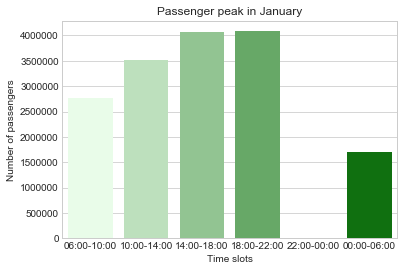

The time slot with the highest number of passenger is 18:00-22:00.


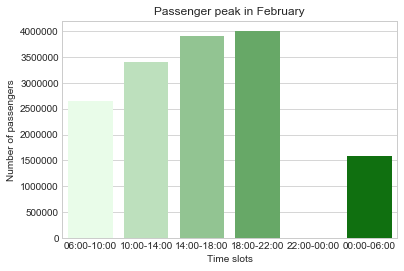

The time slot with the highest number of passenger is 18:00-22:00.


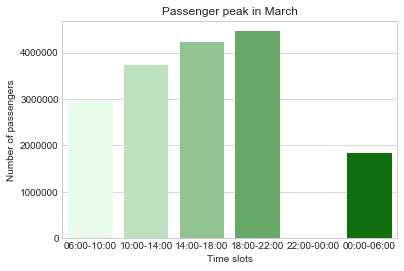

The time slot with the highest number of passenger is 18:00-22:00.


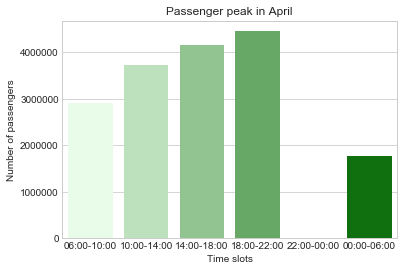

The time slot with the highest number of passenger is 18:00-22:00.


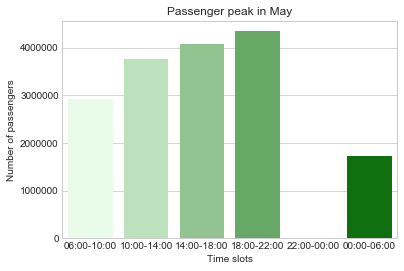

The time slot with the highest number of passenger is 18:00-22:00.


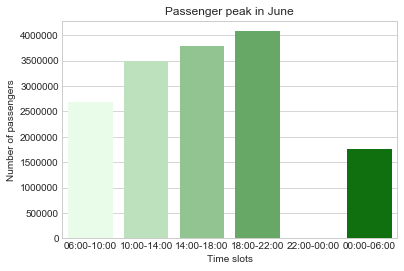

In [9]:
d = {'January': jan, 'February': feb, 'March': mar, 'April': apr, 'May': may, 'June': jun}
print('About overall New York:')
for key, values in d.items():
    passenger_peak(values, key)

About Bronx:
The time slot with the highest number of passenger is 06:00-10:00.


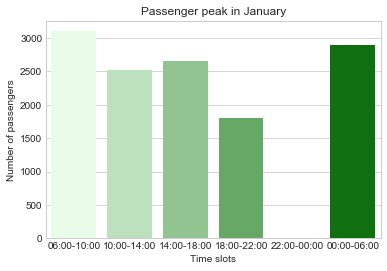

The time slot with the highest number of passenger is 06:00-10:00.


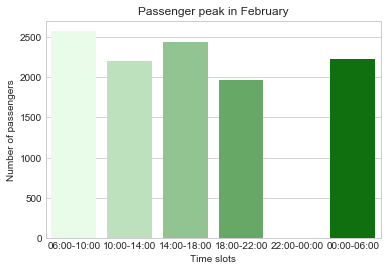

The time slot with the highest number of passenger is 06:00-10:00.


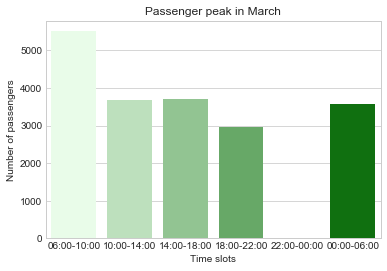

The time slot with the highest number of passenger is 06:00-10:00.


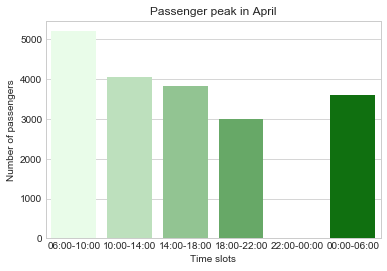

The time slot with the highest number of passenger is 06:00-10:00.


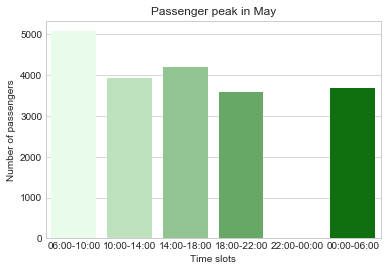

The time slot with the highest number of passenger is 06:00-10:00.


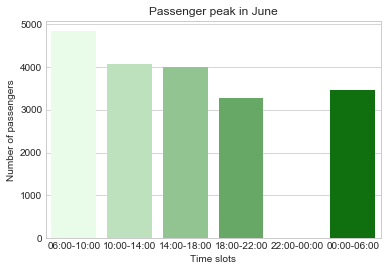

In [10]:
print('About Bronx:')
for key, values in d.items():
    #we filter the dataframe to consider just trips that starts in Bronx
    Bronx = values.loc[values['Borough'] == 'Bronx'][['tpep_pickup_datetime', 'passenger_count']]
    passenger_peak(Bronx, key)

About Brooklyn:
The time slot with the highest number of passenger is 00:00-06:00.


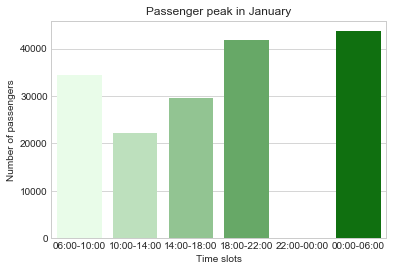

The time slot with the highest number of passenger is 18:00-22:00.


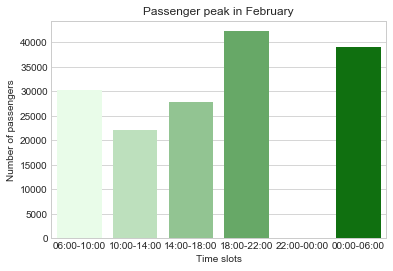

The time slot with the highest number of passenger is 18:00-22:00.


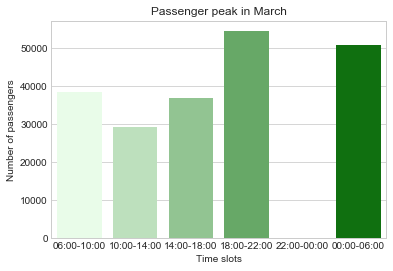

The time slot with the highest number of passenger is 18:00-22:00.


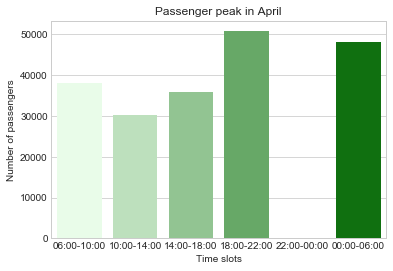

The time slot with the highest number of passenger is 18:00-22:00.


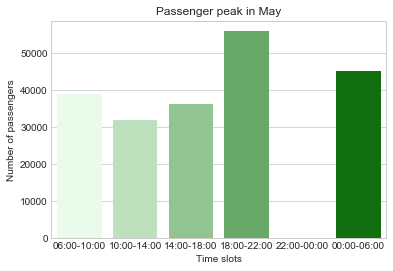

The time slot with the highest number of passenger is 18:00-22:00.


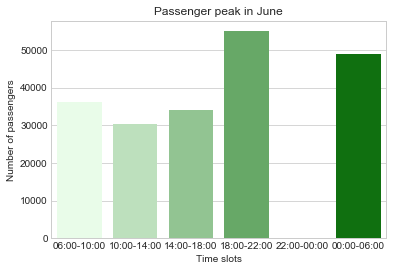

In [11]:
print('About Brooklyn:')
for key, values in d.items():
    Brooklyn = values.loc[values['Borough'] == 'Brooklyn'][['tpep_pickup_datetime', 'passenger_count']]
    passenger_peak(Brooklyn, key)

About EWR:
The time slot with the highest number of passenger is 14:00-18:00.


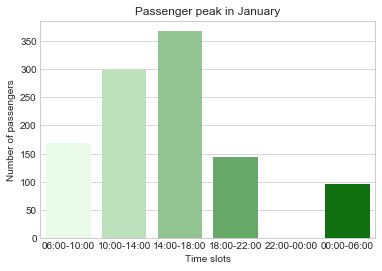

The time slot with the highest number of passenger is 14:00-18:00.


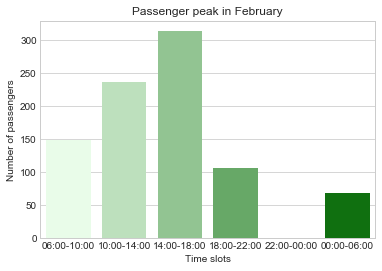

The time slot with the highest number of passenger is 14:00-18:00.


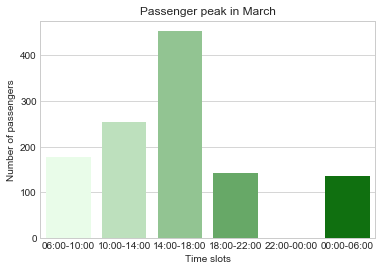

The time slot with the highest number of passenger is 14:00-18:00.


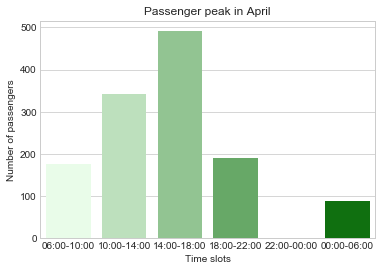

The time slot with the highest number of passenger is 14:00-18:00.


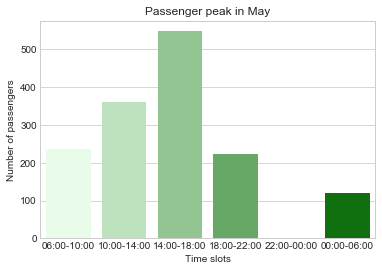

The time slot with the highest number of passenger is 14:00-18:00.


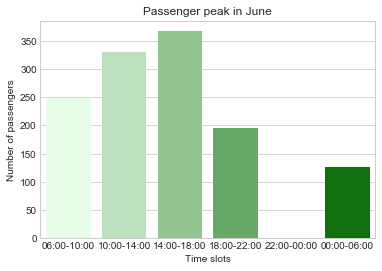

In [12]:
print('About EWR:')
for key, values in d.items():
    EWR = values.loc[values['Borough'] == 'EWR'][['tpep_pickup_datetime', 'passenger_count']]
    passenger_peak(EWR, key)

About Manhattan:
The time slot with the highest number of passenger is 18:00-22:00.


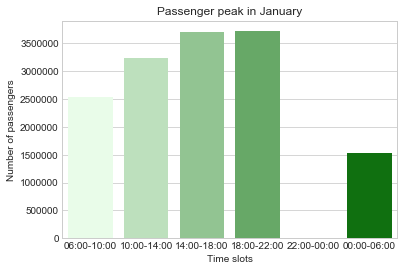

The time slot with the highest number of passenger is 18:00-22:00.


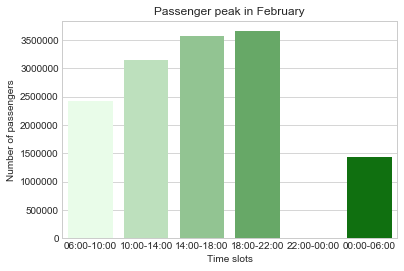

The time slot with the highest number of passenger is 18:00-22:00.


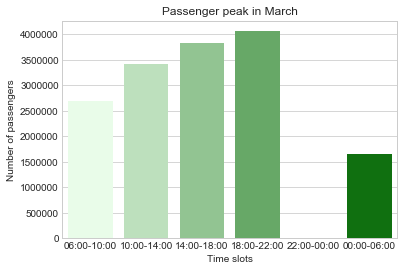

The time slot with the highest number of passenger is 18:00-22:00.


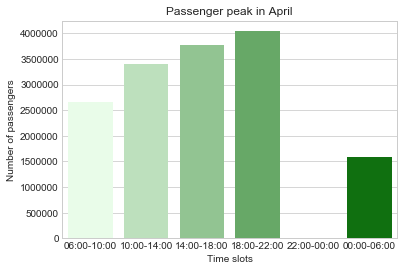

The time slot with the highest number of passenger is 18:00-22:00.


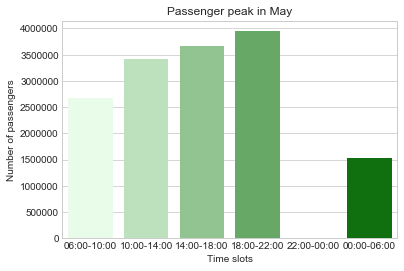

The time slot with the highest number of passenger is 18:00-22:00.


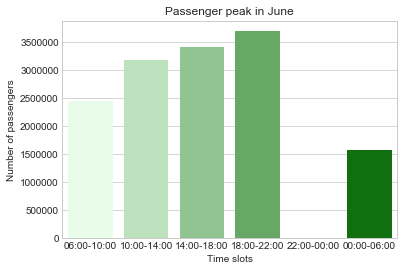

In [13]:
print('About Manhattan:')
for key, values in d.items():
    Manhattan = values.loc[values['Borough'] == 'Manhattan'][['tpep_pickup_datetime', 'passenger_count']]
    passenger_peak(Manhattan, key)

About Queens:
The time slot with the highest number of passenger is 14:00-18:00.


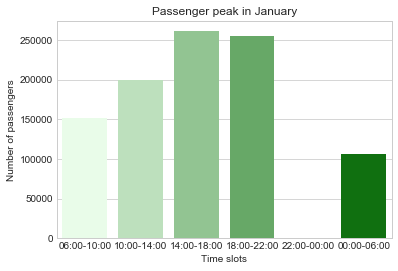

The time slot with the highest number of passenger is 18:00-22:00.


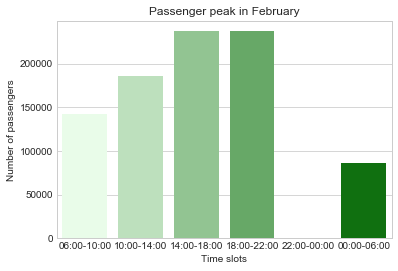

The time slot with the highest number of passenger is 14:00-18:00.


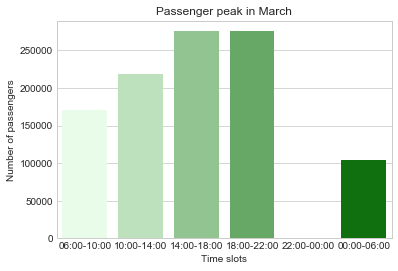

The time slot with the highest number of passenger is 14:00-18:00.


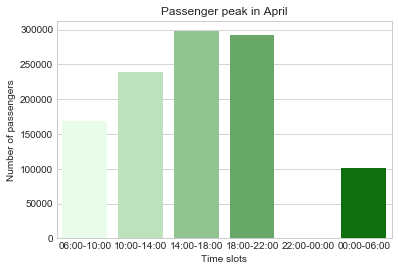

The time slot with the highest number of passenger is 14:00-18:00.


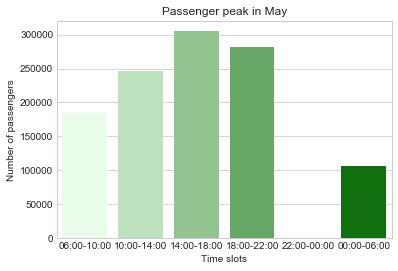

The time slot with the highest number of passenger is 14:00-18:00.


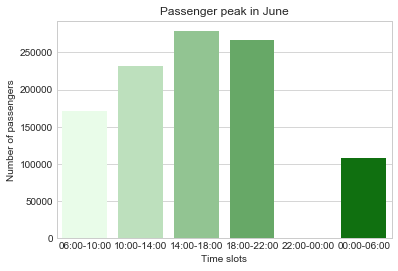

In [14]:
print('About Queens:')
for key, values in d.items():
    Queens = values.loc[values['Borough'] == 'Queens'][['tpep_pickup_datetime', 'passenger_count']]
    passenger_peak(Queens, key)

About Staten Island:
The time slot with the highest number of passenger is 14:00-18:00.


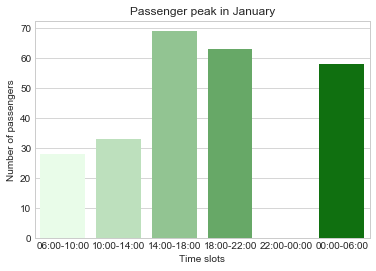

The time slot with the highest number of passenger is 14:00-18:00.


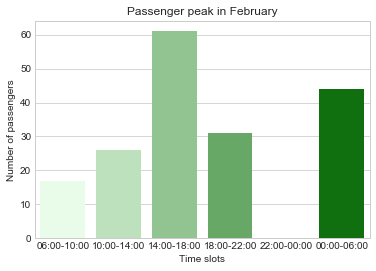

The time slot with the highest number of passenger is 00:00-06:00.


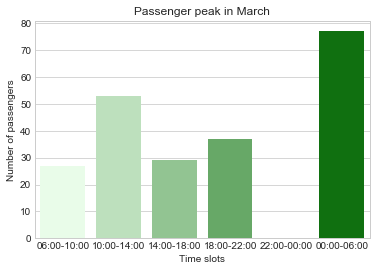

The time slot with the highest number of passenger is 00:00-06:00.


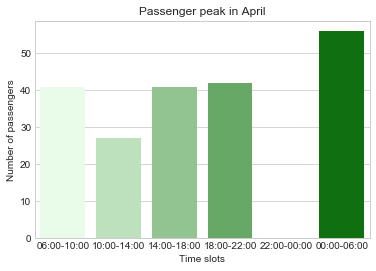

The time slot with the highest number of passenger is 00:00-06:00.


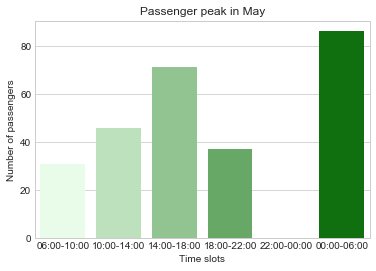

The time slot with the highest number of passenger is 10:00-14:00.


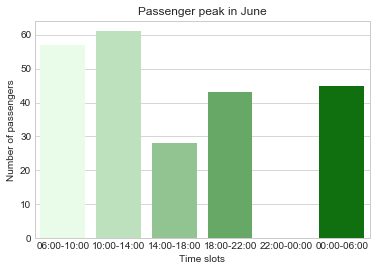

In [15]:
print('About Staten Island:')
for key, values in d.items():
    Staten_Island = values.loc[values['Borough'] == 'Staten Island'][['tpep_pickup_datetime', 'passenger_count']]
    passenger_peak(Staten_Island, key)

Now we aggregate the data of the entire semester:

The time slot with the highest number of passenger is 18:00-22:00.


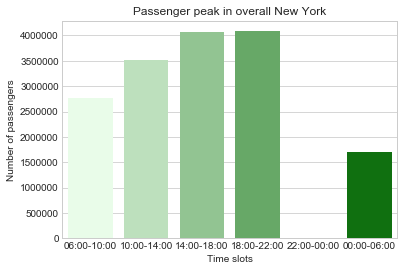

In [16]:
d1 = {'February': feb, 'March': mar, 'April': apr, 'May': may, 'June': jun}
agg = jan[['tpep_pickup_datetime', 'passenger_count', 'Borough']]
for values in d1.values():
    x = values[['tpep_pickup_datetime', 'passenger_count', 'Borough']] #we keep just the needed columns
    agg.append(x) #we create the aggregate dataframe appending all the following month to the first

passenger_peak(agg, 'overall New York')

The time slot with the highest number of passenger is 06:00-10:00.


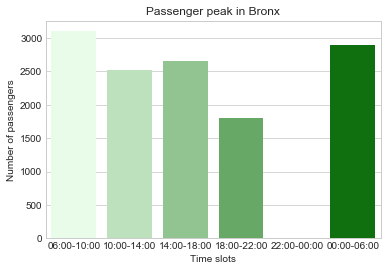

The time slot with the highest number of passenger is 00:00-06:00.


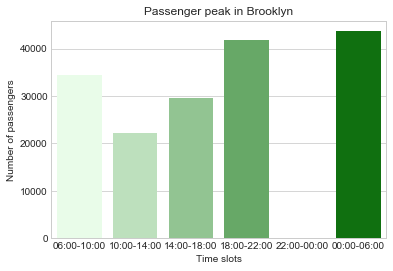

The time slot with the highest number of passenger is 14:00-18:00.


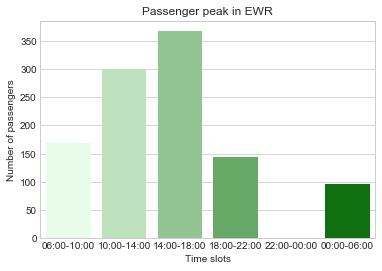

The time slot with the highest number of passenger is 18:00-22:00.


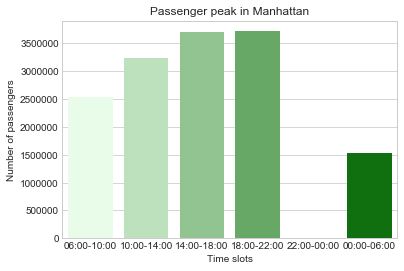

The time slot with the highest number of passenger is 14:00-18:00.


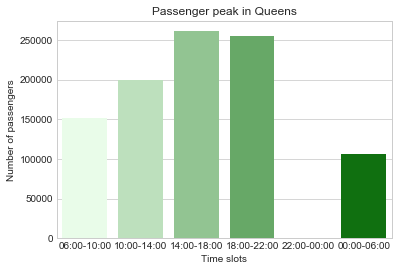

The time slot with the highest number of passenger is 14:00-18:00.


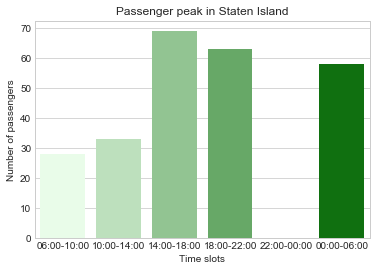

In [17]:
boroughs = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']
for borough in boroughs:
        str_borough = str(borough)
        df = agg.loc[agg['Borough'] == str_borough][['tpep_pickup_datetime', 'passenger_count']]
        passenger_peak(df, borough) 

Overall New York for over the months of first semester of 2018, the time slot with more passengers is the evening (18:00-22:00), indeed the borough with more taxi trips, Manhattan, share this results. Also other borough presents similar conclusions, in Queens the time slot with more passenger is the afternoon (14:00-18:00), except for the month of February (here more passenger in the evening), however for both Manhattan and Queens the afternoon and the evening have a close number of passenger.
In EWR the time slot is still at 14:00-18:00. In Brooklyn the time slot with more passenger is the evening for almost all the month. In Bronx the time slot has very similar number of passenger, but in general the moring is the one with more passengers.
In Staten Island the situation is less defined, with significant changes from month to month, but in the aggregate results the time slot with more passenger is the afternoon.

# RQ 3

Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

Our task is to understand how the trip duration changes during the first semester of 2018 and between boroughs. In order to do that, we need at first to calculate the trip duration, and then to plot the results to see their distribution. 
We start analyzing January, for overall New York.

In [18]:
#we make copy of the dataframe loaded above
jan = January.copy()
feb = February.copy()
mar = March.copy()
apr = April.copy()
may = May.copy()
jun = June.copy()

Text(0,0.5,'N. of trips')

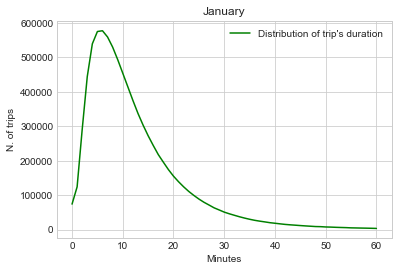

In [19]:
#we calculate the duration of the trip making the difference between pickup time and dropoff time:
j = jan[['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
dropoff = j['tpep_dropoff_datetime']
pickup = j['tpep_pickup_datetime']
delta = (dropoff-pickup).astype('timedelta64[m]') 
#with 'timedelta64[m]' we trosform the difference in the format of the minutes 

#we calcuate how many times every value in delta appears with value_counts
n_trips = pd.DataFrame(delta.value_counts(), columns = ['Distribution of trip\'s duration'])
n_trips = n_trips[n_trips.index >= 0] #elimitate all the trips that lasted less than 0 minutes
#keep just trips that lasted less than an hour (we checked and trips that last more can be treated as outliers)
distro = n_trips[n_trips.index <= 60] 
distro = distro.sort_index()
distro.plot(color = 'g') #plot the distribution
try:
    sns.barplot(distro.index, distro, color = 'g')
except:
    pass
plt.title('January')
plt.xlabel('Minutes')
plt.ylabel('N. of trips')

From the distribution above we can deduce that the highest number of trips are concentrated around the values of 9 minutes, however there are others that are greater than this value (i.e. mode and mean do not coincide). Here, in fact, we are in precence of a right-skewed distribution, therefore the longest tail is to the right of the central maximum value. 
Looking at the figure we conclude that the majority of trips last between 1 and 20 minutes, therefore we cannot claim that all the trips last the same.

Now we analyse the overall situation of New york during following months of 2018:

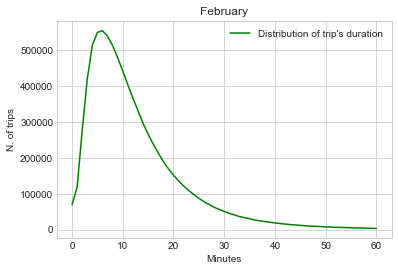

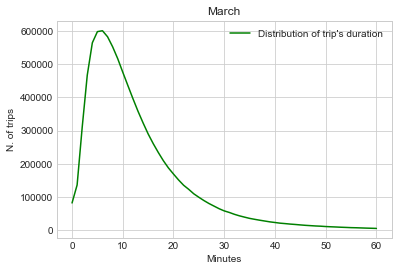

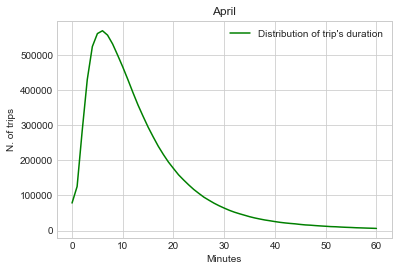

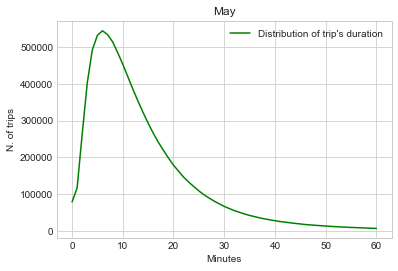

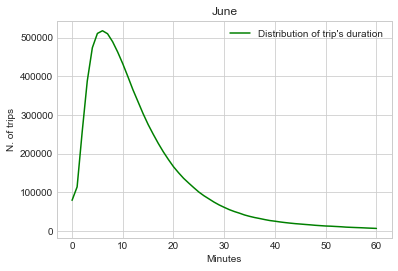

In [20]:
d = {'February': feb, 'March': mar, 'April': apr, 'May': may, 'June':jun}

#taking a cue from the code above, we define a function to plot the trip's duration for the other months:
def trips_per_zone(zone, month):
    dropoff = zone['tpep_dropoff_datetime']
    pickup = zone['tpep_pickup_datetime']
    delta = (dropoff-pickup).astype('timedelta64[m]')
    n_trips = pd.DataFrame(delta.value_counts(), columns = ['Distribution of trip\'s duration'])
    n_trips = n_trips[n_trips.index >= 0]
    distro = n_trips[n_trips.index <= 60]
    distro = distro.sort_index()
    distro.plot(color = 'g') #plot the distribution
    try:
        sns.barplot(distro.index, distro, color = 'g')
    except:
        pass
    plt.title(month)
    plt.xlabel('Minutes')
    plt.ylabel('N. of trips')
    
for key, values in d.items():
    trips_per_zone(values, key)

The situation has not changed from January, the values are still around the 9 minutes.

Now let's move on the analysis for each borough. We analyse each borough for every month:

About Bronx:


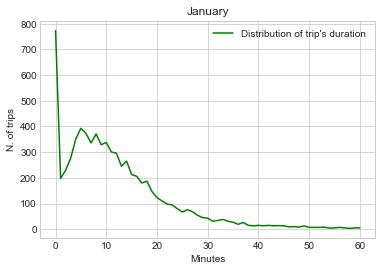

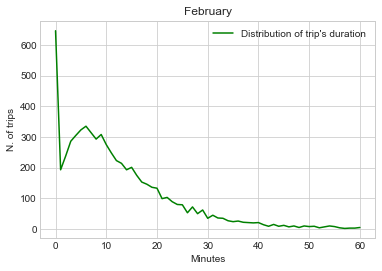

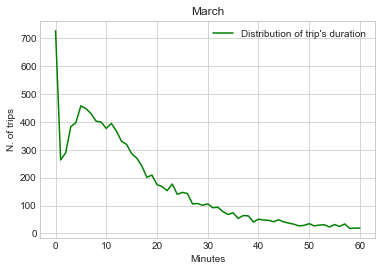

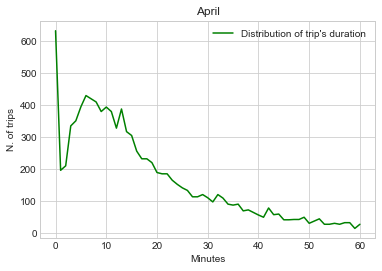

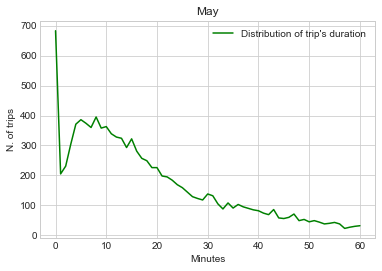

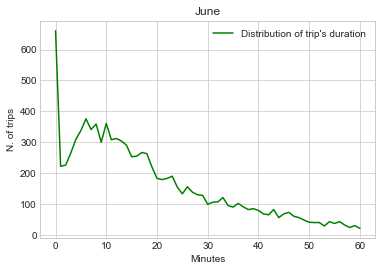

In [21]:
d = {'January':jan, 'February': feb, 'March': mar, 'April': apr, 'May': may, 'June':jun}
print('About Bronx:')
for key, values in d.items():
    #we filter the dataframe to consider just trips that starts in Bronx
    Bronx = values.loc[values['Borough'] == 'Bronx'][['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
    trips_per_zone(Bronx, key)

The Bronx is one of the boroughs with less number of trips. The trips, however, have a longer duration than overall New York (around 15 min) and their distribution is more spread. We do not register a significant change during the semester.

About Brooklyn:


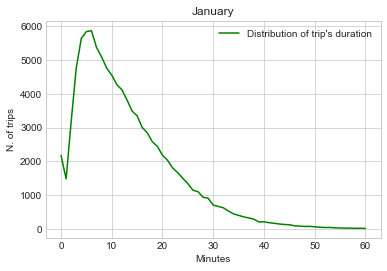

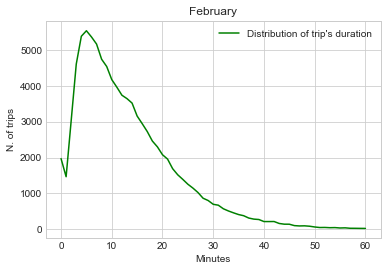

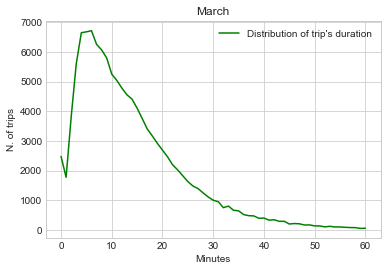

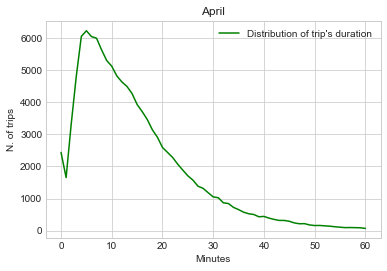

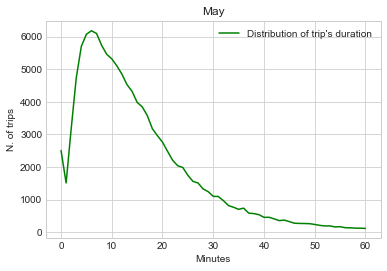

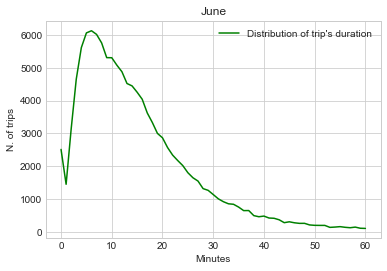

In [22]:
print('About Brooklyn:')
for key, values in d.items():
    Brooklyn = values.loc[values['Borough'] == 'Brooklyn'][['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
    trips_per_zone(Brooklyn, key)

In Brooklyn the distribution, in a smaller scale, resamble the distribution of trip duration overall New York.

About EWR:


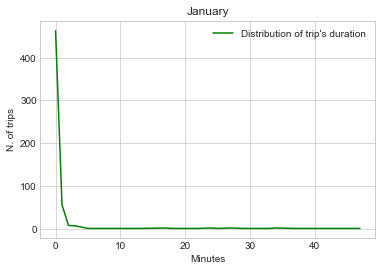

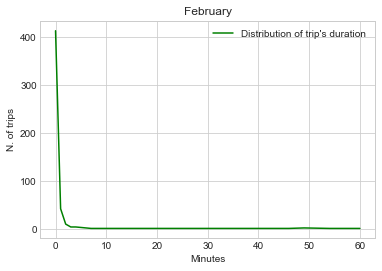

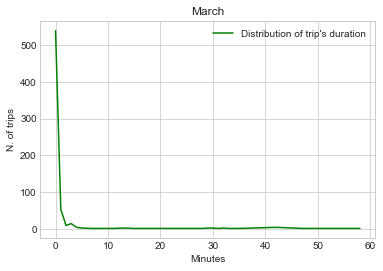

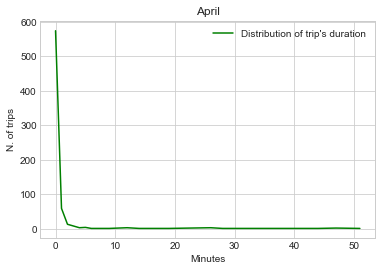

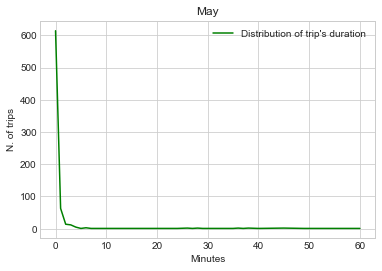

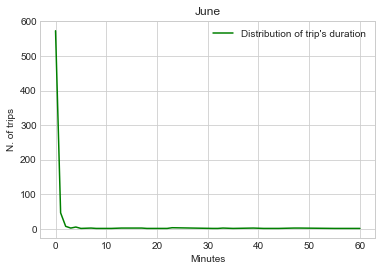

In [23]:
print('About EWR:')
for key, values in d.items():
    EWR = values.loc[values['Borough'] == 'EWR'][['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
    trips_per_zone(EWR, key)

EWR, the borough of the Newark International Airport, there are a low number of trips, the trips are of a short duration.

About Manhattan:


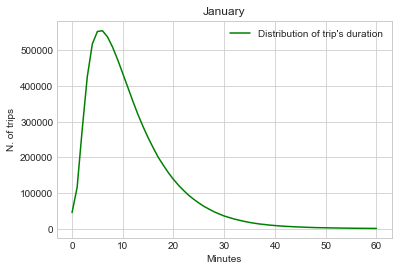

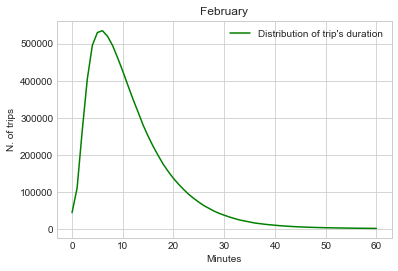

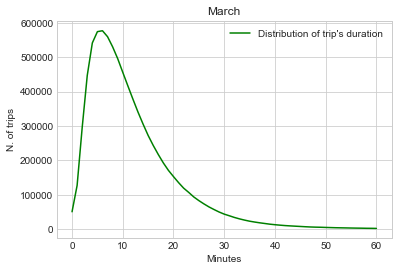

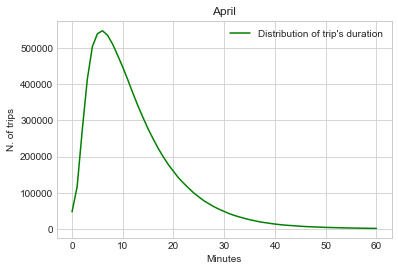

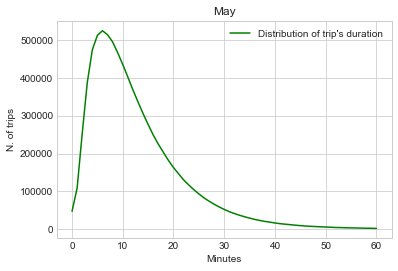

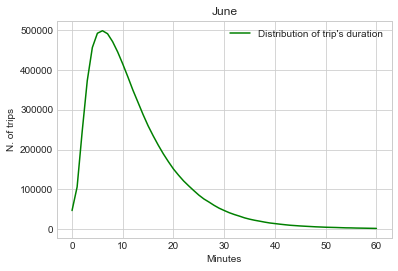

In [24]:
print('About Manhattan:')
for key, values in d.items():
    Manhattan = values.loc[values['Borough'] == 'Manhattan'][['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
    trips_per_zone(Manhattan, key)

The borough of Manhattan, the one with the highest number of trips (therefore the one that affect more the overall results of New York), has therefore a very similar distribution to the one of the whole town, duration concentred around 9 min.

About Queens:


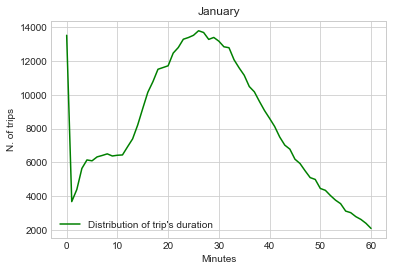

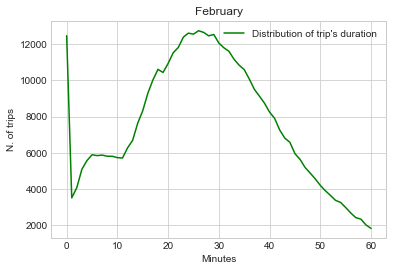

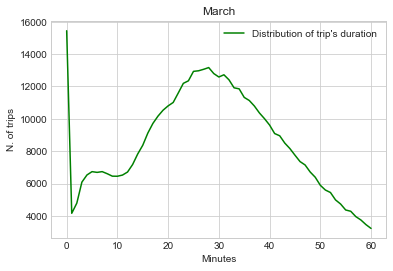

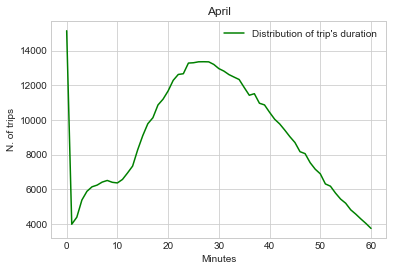

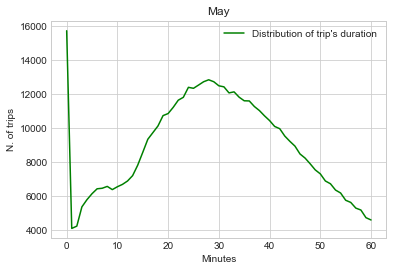

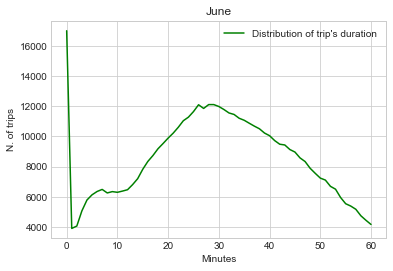

In [25]:
print('About Queens:')
for key, values in d.items():
    Queens = values.loc[values['Borough'] == 'Queens'][['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
    trips_per_zone(Queens, key)

Queens is the borough with the longer trip duration, around 30 minutes. However the distribution is spreader than the other boroughs, with the majority of trip lasting between 15 to 40 minutes. Here we can also see a slight variation in distribution, little more concentrated around 30 minutes becoming  more spreader over the months.

About Staten Island:


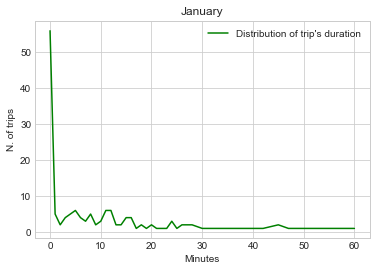

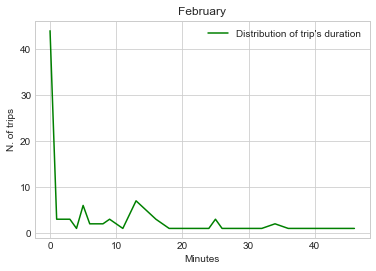

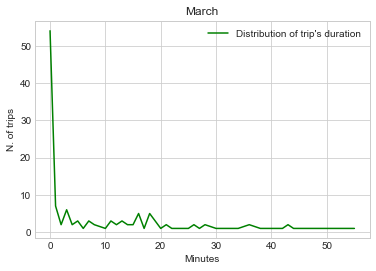

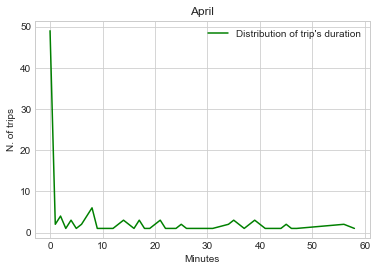

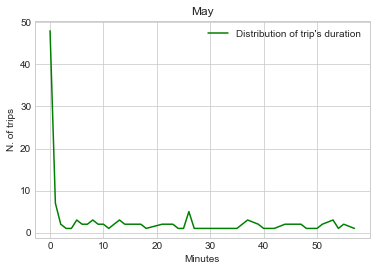

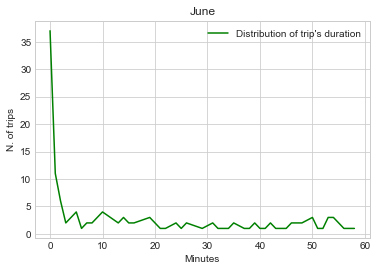

In [26]:
print('About Staten Island:')
for key, values in d.items():
    Staten_Island = values.loc[values['Borough'] == 'Staten Island'][['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
    trips_per_zone(Staten_Island, key)

Staten Island has a low number of trips, here the distribution is not concetrated around any value. Just in February we can register a small concentration around 15 minutes.

Now we aggregate the results for all the months and comment the results:

In [27]:
agg = jan[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'Borough']]
d = {'February': feb, 'March': mar, 'April': apr, 'May': may, 'June':jun}
for values in d.values():
    x = values[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'Borough']] #we keep just the needed columns
    agg.append(x) #we create the aggregate dataframe appending all the following month to the first

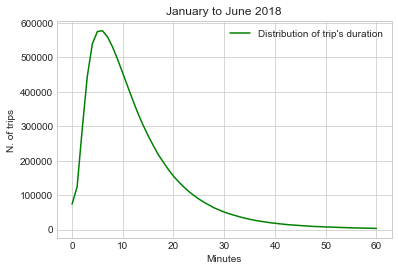

In [28]:
trips_per_zone(agg, 'January to June 2018')

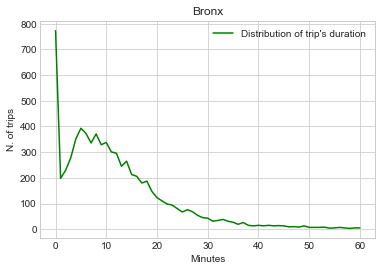

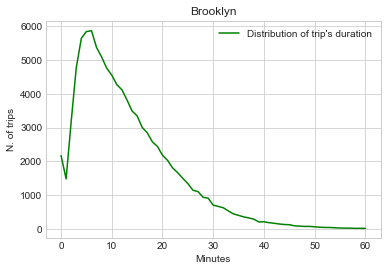

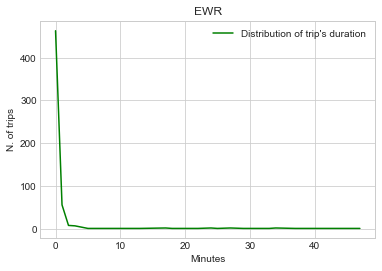

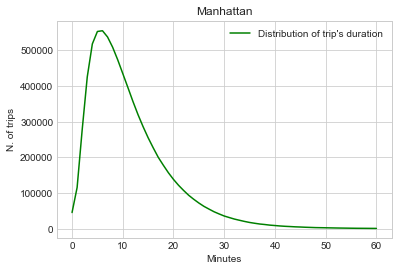

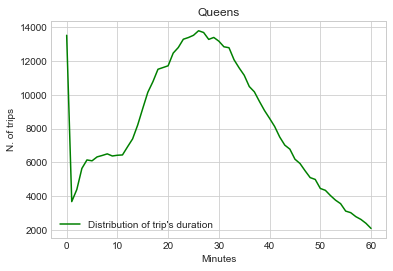

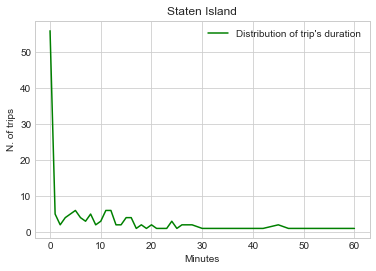

In [29]:
boroughs = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']
for borough in boroughs:
        str_borough = str(borough)
        df = agg.loc[agg['Borough'] == str_borough][['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
        trips_per_zone(df, borough) 

Aggregating the results, we can have a wider prospective on the situaition overall the first semester of 2018. The distribution of trip duration computed for the whole city, shows a clear concetration around 9 minutes with a variation of +-9 min, so the trips do not last the same but we can say that in general the trips are of a short duration. 
A similar situation is registred in Manhattan (the borough with more trips, so the one that affect more the overall situation of New York). 
In EWR the majority of the trips last few minutes.
In Brooklyn and Bronx the distribution is spreader, but there is still a tendency for short trips (in general less than 30 minutes). 
The Queens has the spreader distribution, there is a little concetration around 30 minutes, but the duration can really change a lot from trip to trip.
Staten Island is the borough more difficult to describe, there is a very slight tendency for trips less than 30  minutes.

# RQ4
What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

Borough Name: Manhattan
Borough Name: Queens
Borough Name: Bronx
Borough Name: Brooklyn
Borough Name: Unknown
Borough Name: EWR


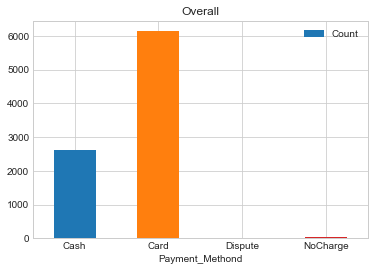

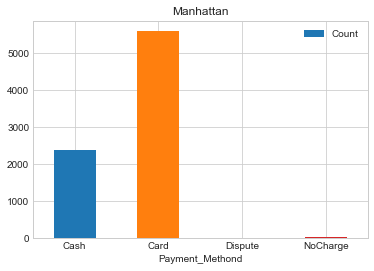

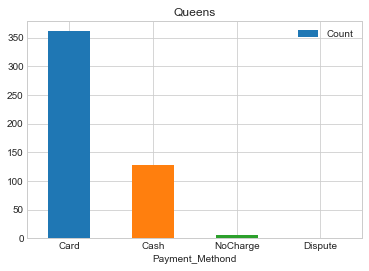

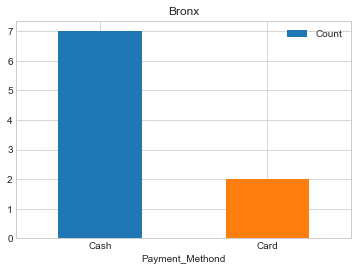

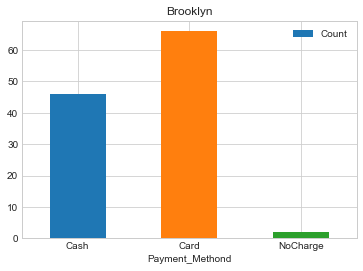

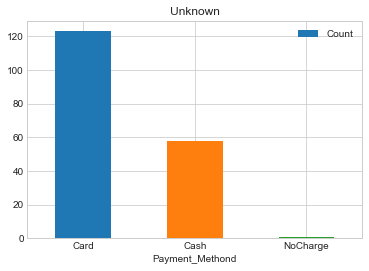

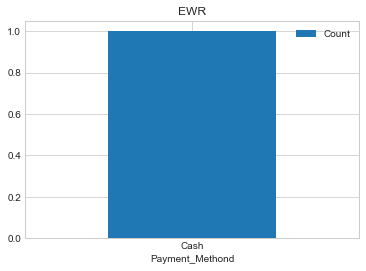

In [30]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
from sqlalchemy import create_engine
import os as os
from datetime import datetime
import traceback
from enum import Enum
%matplotlib inline

#class this will be on seperate fileso
class EachMonthTrips:
    payments_count = {}
    payments_count_for_each_borough = {}

#Enum
class Payment_Types(Enum):
    Card = 1
    Cash = 2
    NoCharge = 3
    Dispute = 4
    Unknown = 5
    Voided = 6
   
    
#filesname variables
yellow_tripdata_2018 = 'yellow_tripdata_2018-01'
taxi_zone_lookup = 'taxi_zone_lookup.csv'

#This function will generate the chunk and yeild it where it is demanded
def chunck_generator(filename, header=False,chunk_size = 10 ** 5): # notice the default value for chunk_size and header
    for chunk in pd.read_csv(filename,delimiter=',', iterator=True, chunksize=chunk_size, parse_dates=[1] ): 
        yield (chunk)
        
#This function will also used for generating the chunk but it will yeild out the single row which being used for calculation
def _generator( filename, header=False,chunk_size = 10 ** 5): # notice the default value for chunk_size and header
    chunk = chunck_generator(filename, header=False,chunk_size = 10 ** 5)
    for row in chunk: #go over the chunk file and loop through rows and yeild them
        yield row

#This function will be used to read zone_lookup file
def read_full_csv_file(zone_lookup):
    df = pd.read_csv(zone_lookup)
    return df 


#combinning the data with zone    
def combine_file_with_zone(tripdata_filename, zone_lookup, list_of_months):
    filename = tripdata_filename
    generator = _generator(filename=filename)
    
    continue_iteration = True # this will make iteration to stop
    
            
    index=0;      
    while continue_iteration:
        try:
            yellow_tripdata_chunk = next(generator)
            taxi_zone_data_set = read_full_csv_file(taxi_zone_lookup)
            if isinstance(yellow_tripdata_chunk, pd.DataFrame) and isinstance(taxi_zone_data_set, pd.DataFrame):
                combined_data_set = pd.merge(yellow_tripdata_chunk[:100], taxi_zone_data_set, on= None, left_on = 'PULocationID', right_on = 'LocationID')
                 #finding answers

            for index, row in combined_data_set.iterrows(): # iterating through dataframe
                date = row["tpep_pickup_datetime"] # It is already in DateTime format. Great!
                month_name = '%02d' % date.month #getting month name
                try:
                    payment_method_name = Payment_Types(row["payment_type"]).name
                    if (payment_method_name not in list_of_months[month_name].payments_count):
                        list_of_months[month_name].payments_count[payment_method_name] = 0
                    list_of_months[month_name].payments_count[payment_method_name] = list_of_months[month_name].payments_count[payment_method_name] + 1 
                    if row["Borough"] not in list_of_months[month_name].payments_count_for_each_borough:
                        list_of_months[month_name].payments_count_for_each_borough[row["Borough"]]={}
                    borough_item = list_of_months[month_name].payments_count_for_each_borough[row["Borough"]]
                    if payment_method_name not in borough_item:
                        borough_item[payment_method_name] = 0
                    borough_item[payment_method_name] = borough_item[payment_method_name] + 1
                except Exception as e:
                    pass 
        except Exception as e:
            continue_iteration=False
            pass
        
        
# now I am going to assume that data I have is for 2018
list_of_months = {"01":EachMonthTrips()}

# assigning value to each object of list_of_months for dictionary purposes
        
borough_df = read_full_csv_file(taxi_zone_lookup)

list_of_unqiue_boroughs = borough_df.Borough.unique() #getting and droping unknown borough

files = os.listdir(os.curdir)  #files and directories
index=0
files.reverse()
for filename in files:
    if yellow_tripdata_2018 in filename:
        combine_file_with_zone(filename,taxi_zone_lookup,list_of_months)
        index = index + 1

        
pyments_count_for_jan = list_of_months['01'].payments_count        

data_frame_to_plot = pd.DataFrame({'Payment_Methond':list( pyments_count_for_jan.keys()), 'Count': list(pyments_count_for_jan.values())})
data_frame_to_plot.plot.bar(x='Payment_Methond', y='Count', rot=0,title="Overall")

for borough_key, borough_value in list_of_months['01'].payments_count_for_each_borough.items():
    print("Borough Name: " + borough_key)
    data_frame_to_plot = pd.DataFrame({'Payment_Methond':list( borough_value.keys()), 'Count': list(borough_value.values())})
    data_frame_to_plot.plot.bar(x='Payment_Methond', y='Count', rot=0,title=borough_key)

### What is the most common way of payments? 

The most common way of payment is by using Credit Card as you can see in first graph


### Discover the way payments are executed in each borough and visualise the number of payments for any possible means

I have visualized the information above so to post above details here. 

1. Manhattan - Credit Card
2. Queens - Credit Card
3. Bronx - Cash
4. Brooklyn - Card
5. Unkown - Card
6. EWR - Card
6. Staten - Card

In [31]:
import numpy
import scipy.stats as stats
chi_square_frame_payments_count_for_each_borough = list_of_months['01'].payments_count_for_each_borough;

# for making the for 5 categories of different payments type we have to add Unknown payment method as well
try:
    for borough_key, borough_value in chi_square_frame_payments_count_for_each_borough.items():
        for payment_type_key, payment_type_value in borough_value.items():
            payment_type_value["Unknown"] = 0
except Exception as e:
    pass

# For applying the chi-square test for need to test only Manhattan and Queens as cateory 

manhattan_dic = chi_square_frame_payments_count_for_each_borough["Manhattan"]
manhattan_df = pd.DataFrame({'Name': list( manhattan_dic.keys()),'Value' : list(manhattan_dic.values())})

queens_dic = chi_square_frame_payments_count_for_each_borough["Queens"]
queens_df = pd.DataFrame({'Name':list(queens_dic.keys()),'Value':list(queens_dic.values())})

manhattan_table = manhattan_df
queens_table = queens_df


print( "Manhattan")
print(manhattan_table)
print(" ")
print( "Queens")
print(queens_table)

Manhattan
       Name  Value
0      Cash   2376
1      Card   5586
2   Dispute      7
3  NoCharge     30
 
Queens
       Name  Value
0      Card    361
1      Cash    127
2  NoCharge      6
3   Dispute      1


In [32]:
#Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:
#sum((observed−expected)2expected
#In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. Let's calculate the chi-squared statistic for our data to illustrate:

observed = queens_table.Value
manhattan_ratio = manhattan_table.Value/sum(manhattan_table.Value) # Get population ratios
expected = manhattan_ratio * sum(queens_table.Value)   # Get expected counts
chi_squared_stat = (((observed-expected)**2)/expected).sum()

In [33]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
0.0


In [34]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=521.6404719600317, pvalue=9.742414891285215e-113)

Note: I have used this link for chi-square test as reference : http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

# Q5
Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [35]:
#we make copy of the dataframe loaded above
jan = January.copy()
feb = February.copy()
mar = March.copy()
apr = April.copy()
may = May.copy()
jun = June.copy()

We have used the function of pandas groupby with which we have divided the data frame considering the variable borough. For each borough we calculated the correlation between the two variables of interest (distance and time)

In [36]:
from scipy.stats.stats import pearsonr
import seaborn as sns
def pearson(df, str_):
    print('About '+str_+':')
    df2 = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
    t1_f = df2['tpep_pickup_datetime']
    t2_f = df2['tpep_dropoff_datetime']
    time_diff = t2_f-t1_f
    time_diff = time_diff.astype('timedelta64[m]') #we have trasformed the difference in minutes as integer 64
    dict_2 = {'time_diff': time_diff, 'borough': df2['Borough'], 'distance': df2['trip_distance'], 'fare amount': df2['fare_amount']}
    datafm2 = pd.DataFrame(dict_2) #new dataframe with just needed columns
    datafm2 = datafm2.dropna(axis = 0) #dropna rows in datafm2
    datafm2 = datafm2.loc[datafm2['time_diff'] > 0]    #we have taken the value > 0 and < 120
    datafm2 = datafm2.loc[datafm2['time_diff'] <= 120]
    grouped = datafm2.groupby('borough')  #We have used the function of pandas groupby with which we have divided 
    # the data frame considering the variable borough. For each borough we calculated the correlation between the 
    #two variables of interest (distance and time)
    print(grouped[['distance','time_diff']].corr())
    grouped = datafm2.groupby('borough')
    grouped[['distance','time_diff']].corr()
    sampled = datafm2.sample(100000) #we took a sample of 100000 rows
    print('Pearson coefficient:')
    p = pearsonr(datafm2['distance'], datafm2['time_diff']) # pearson coefficient
    print(p)
    sns.regplot(x = "distance", y = 'time_diff', data = sampled, color = 'g')

We do the analysis for each month:
We do the analysis for each month:
In Janauary, for each borough the correlation index is greater than 0.75. These values lead us to hypothesize a strong positive linear correlation. The value of the highest correlation is recorded for the borough Brooklyn.The value of the smallest correlation is recorded for the borough Queens.
Calculating the correlation coefficients, considering the whole city, we have a little value(0.044).There's no linear corelation.

To plot the relationship between the two variables we chose a fairly large sample representative of the population of interest. The graphic representation confirms the hypothesis of  linear correlation between the two reference variables(even if the pearson coefficient,maybe for our mistake,is no showing a linear correlation). Obviously, the graph shows the values relating to journeys with a duration of less than 120 minutes. 

About January:
                         distance  time_diff
borough                                     
Bronx         distance   1.000000   0.742714
              time_diff  0.742714   1.000000
Brooklyn      distance   1.000000   0.792241
              time_diff  0.792241   1.000000
EWR           distance   1.000000   0.732910
              time_diff  0.732910   1.000000
Manhattan     distance   1.000000   0.763164
              time_diff  0.763164   1.000000
Queens        distance   1.000000   0.014392
              time_diff  0.014392   1.000000
Staten Island distance   1.000000   0.788005
              time_diff  0.788005   1.000000
Unknown       distance   1.000000   0.773896
              time_diff  0.773896   1.000000
Pearson coefficient:
(0.04438491914399016, 0.0)


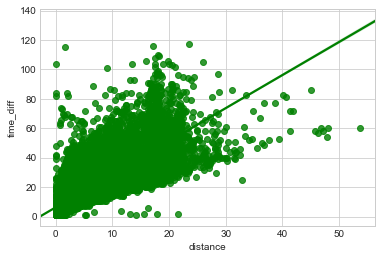

In [37]:
#January
pearson(jan, 'January')

In February, generally speaking, for each borough the correlation index, is greater than 0.75. These values lead us to hypothesize a strong positive linear correlation. The value of the highest correlation is recorded for the borough Staten Island(0.89).The value of the smallest correlation is recorded for the borough Queens(0.73).
Calculating the correlation coefficients, considering the whole city, we have a value equal to 0.80.There's a positive  linear correlation. 

About February:
                         distance  time_diff
borough                                     
Bronx         distance   1.000000   0.769788
              time_diff  0.769788   1.000000
Brooklyn      distance   1.000000   0.794040
              time_diff  0.794040   1.000000
EWR           distance   1.000000   0.790957
              time_diff  0.790957   1.000000
Manhattan     distance   1.000000   0.767863
              time_diff  0.767863   1.000000
Queens        distance   1.000000   0.739008
              time_diff  0.739008   1.000000
Staten Island distance   1.000000   0.894947
              time_diff  0.894947   1.000000
Unknown       distance   1.000000   0.780816
              time_diff  0.780816   1.000000
Pearson coefficient:
(0.8005419782022135, 0.0)


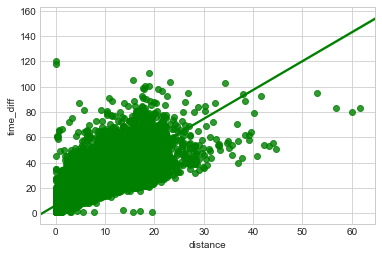

In [38]:
#February
pearson(feb, 'February')

In March, generally speaking, for each borough the correlation index, is greater than 0.76. These values lead us to hypothesize a strong positive linear correlation. The value of the highest correlation is recorded for the borough Staten Island(0.90).The value of the smallest correlation is recorded for the borough Queens(0.73).
Calculating the correlation coefficients, considering the whole city, we have a little value(0.80).There's a positive linear correlation.

About March:
                         distance  time_diff
borough                                     
Bronx         distance   1.000000   0.774630
              time_diff  0.774630   1.000000
Brooklyn      distance   1.000000   0.801700
              time_diff  0.801700   1.000000
EWR           distance   1.000000   0.764936
              time_diff  0.764936   1.000000
Manhattan     distance   1.000000   0.773832
              time_diff  0.773832   1.000000
Queens        distance   1.000000   0.714680
              time_diff  0.714680   1.000000
Staten Island distance   1.000000   0.904123
              time_diff  0.904123   1.000000
Unknown       distance   1.000000   0.789081
              time_diff  0.789081   1.000000
Pearson coefficient:
(0.8055032042385261, 0.0)


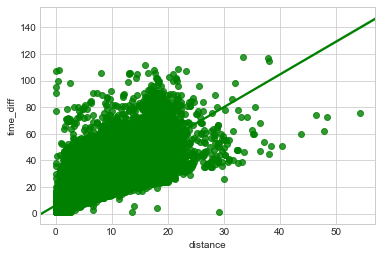

In [39]:
#March
pearson(mar, 'March')

In April, generally speaking, for each borough the correlation index, is greater than 0.77. These values lead us to hypothesize a strong positive linear correlation. The value of the highest correlation is recorded for the borough Staten Island(0.86).The value of the smallest correlation is recorded for the borough Queens(0.69).
 Calculating the correlation coefficients, considering the whole city, we have a little value(0.80).There's a positive linear correlation.

About April:
                         distance  time_diff
borough                                     
Bronx         distance   1.000000   0.816701
              time_diff  0.816701   1.000000
Brooklyn      distance   1.000000   0.811039
              time_diff  0.811039   1.000000
EWR           distance   1.000000   0.811247
              time_diff  0.811247   1.000000
Manhattan     distance   1.000000   0.771071
              time_diff  0.771071   1.000000
Queens        distance   1.000000   0.690153
              time_diff  0.690153   1.000000
Staten Island distance   1.000000   0.865196
              time_diff  0.865196   1.000000
Unknown       distance   1.000000   0.780938
              time_diff  0.780938   1.000000
Pearson coefficient:
(0.8026289404022035, 0.0)


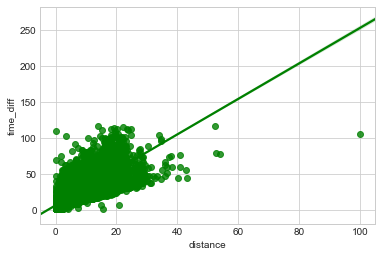

In [40]:
#April
pearson(apr, 'April')

In May, generally speaking, for each borough the correlation index, is greater than 0.77. These values lead us to hypothesize a strong positive linear correlation. The value of the highest correlation is recorded for the borough EWR(0.83).The value of the smallest correlation is recorded for the borough Queens(0.66).
 Calculating the correlation coefficients, considering the whole city, we have a value equal to 0.79.There's a positive linear correlation.

About May:
                         distance  time_diff
borough                                     
Bronx         distance   1.000000   0.819830
              time_diff  0.819830   1.000000
Brooklyn      distance   1.000000   0.808448
              time_diff  0.808448   1.000000
EWR           distance   1.000000   0.830340
              time_diff  0.830340   1.000000
Manhattan     distance   1.000000   0.756900
              time_diff  0.756900   1.000000
Queens        distance   1.000000   0.668716
              time_diff  0.668716   1.000000
Staten Island distance   1.000000   0.786912
              time_diff  0.786912   1.000000
Unknown       distance   1.000000   0.771413
              time_diff  0.771413   1.000000
Pearson coefficient:
(0.7935413705617395, 0.0)


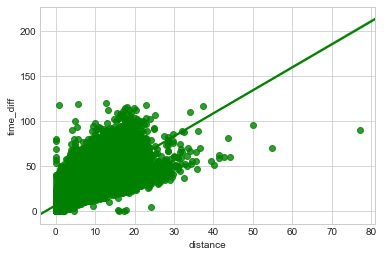

In [41]:
#May
pearson(may, 'May')

In June, generally speaking, for each borough the correlation index, is greater than 0.80. These values lead us to hypothesize a strong positive linear correlation. The value of the highest correlation is recorded for the borough Brooklyn(0.81).The value of the smallest correlation is recorded for the borough Queens(0.71).
 Calculating the correlation coefficients, considering the whole city, we have a value equal to 0.80.There's a positive linear correlation.

About June:
                         distance  time_diff
borough                                     
Bronx         distance   1.000000   0.821935
              time_diff  0.821935   1.000000
Brooklyn      distance   1.000000   0.817287
              time_diff  0.817287   1.000000
EWR           distance   1.000000   0.768826
              time_diff  0.768826   1.000000
Manhattan     distance   1.000000   0.767371
              time_diff  0.767371   1.000000
Queens        distance   1.000000   0.714791
              time_diff  0.714791   1.000000
Staten Island distance   1.000000   0.784668
              time_diff  0.784668   1.000000
Unknown       distance   1.000000   0.790695
              time_diff  0.790695   1.000000
Pearson coefficient:
(0.8075721040003269, 0.0)


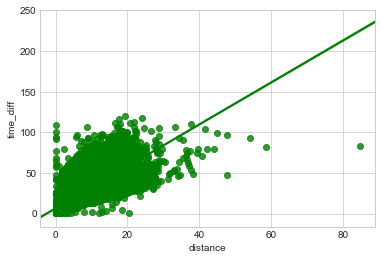

In [42]:
#June
pearson(jun, 'June')

In [43]:
agg = feb[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
d = {'March': mar, 'April': apr, 'May': may, 'June':jun}
for values in d.values():
    x = values[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
    #we keep just the needed columns
    agg.append(x) #we create the aggregate dataframe appending all the following month to the first

For six month, generally speaking, for each borough the correlation index, is greater than 0.76. These values lead us to hypothesize a strong positive linear correlation. The value of the highest correlation is recorded for the borough Staten Island(0.89).The value of the smallest correlation is recorded for the borough Queens(0.73). Calculating the correlation coefficients, considering the whole city, we have a value(0.80).There's a positive linear correlation.

About I Semester 2018:
                         distance  time_diff
borough                                     
Bronx         distance   1.000000   0.769788
              time_diff  0.769788   1.000000
Brooklyn      distance   1.000000   0.794040
              time_diff  0.794040   1.000000
EWR           distance   1.000000   0.790957
              time_diff  0.790957   1.000000
Manhattan     distance   1.000000   0.767863
              time_diff  0.767863   1.000000
Queens        distance   1.000000   0.739008
              time_diff  0.739008   1.000000
Staten Island distance   1.000000   0.894947
              time_diff  0.894947   1.000000
Unknown       distance   1.000000   0.780816
              time_diff  0.780816   1.000000
Pearson coefficient:
(0.8005419782022135, 0.0)


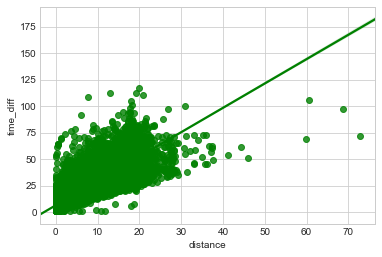

In [44]:
#Jan to June 2018
pearson(agg, 'I Semester 2018')

# CRQ 1.1
Does the fare for mile change across NY's borough? We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

In [45]:
#we make copy of the dataframe loaded above
jan = January.copy()
feb = February.copy()
mar = March.copy()
apr = April.copy()
may = May.copy()
jun = June.copy()

In [40]:
import scipy.stats as stats
def cq1(df, str_):
    print('About '+str_+':')
    df2 = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
    t1_f = df2['tpep_pickup_datetime']
    t2_f = df2['tpep_dropoff_datetime']
    time_diff = t2_f-t1_f
    time_diff = time_diff.astype('timedelta64[m]')
    dict_2 = {'time_diff': time_diff, 'borough': df2['Borough'], 'distance': df2['trip_distance'], 'fare amount': df2['fare_amount']}
    datafm2 = pd.DataFrame(dict_2)
    datafm2 = datafm2.dropna(axis = 0)
    datafm2 = datafm2.loc[datafm2['time_diff'] > 0]
    datafm2 = datafm2.loc[datafm2['time_diff'] <= 120]
    grouped_p = datafm2.groupby('borough')
    x = grouped_p['fare amount'].agg([np.mean, np.std])
    print(x)
    sampled = datafm2.sample(100000)
    #until here we use the same code of the previous definition pearson()
    sampled['fare amount'].plot.kde(label = "Overall New York")
    grouped_p = sampled.groupby('borough')['fare amount']
    f1 = grouped_p.get_group('Manhattan')
    f1.plot.kde(label = "Manhattan")
    f2 = grouped_p.get_group('Queens')
    f2.plot.kde(label = "Queens")
    f3 = grouped_p.get_group('Brooklyn')
    f3.plot.kde(label = "Brooklyn")
    #f4 = grouped_p.get_group('Staten Island')
    #f4.plot.kde(label = "Staten Island")
    plt.title('Price distribution per borough')
    plt.legend();
    
    stat_ = stats.f_oneway(f1, f2, f3) #we compute anova
    print('ANOVA:')
    print(stat_)
    

The hypothesis underlying the analysis of variance is that data G groups (borough), it is possible to break down the variance into two components: Variance inside the groups (also called Variance Within) and Variance between the groups (Variance Between). The reason that pushes to make this distinction is the conviction, that certain phenomena find an explanation in the characteristics of the group to which they belong.For example, in January, the test output yields an F-statistic of 61.16 and a p-value of 2.8624097955027074e-27, indicating that there is  significant difference between the means of each group.
The interpretation of the p-value correctly rejects the null hypothesis, FOR EACH MONTHS, indicating that one or more sample means differ.
We have graphically represented the distributions of prices associated with the borough. Many of them,FOR EACH MONTH, seem to have a chi-square distribution.

We have used  only three Borough(Manhattan, Brooklyn, Queens) because sometimes we faced errors while running other zones.

About January:
                    mean        std
borough                            
Bronx          14.442276  15.887462
Brooklyn       13.436999  10.138883
EWR            68.342736  45.456798
Manhattan      10.676578   7.777316
Queens         34.867872  18.563495
Staten Island  20.391954  22.503655
Unknown        12.393549  25.986068
ANOVA:
F_onewayResult(statistic=21063.379608791478, pvalue=0.0)


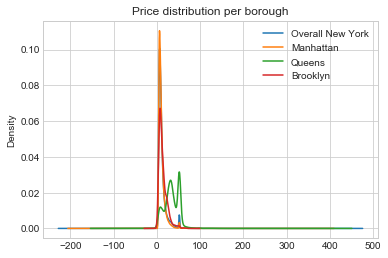

In [41]:
#January
cq1(jan, 'January')

About February:
                    mean        std
borough                            
Bronx          15.065188  18.838622
Brooklyn       13.429263  10.119737
EWR            57.680494  45.440626
Manhattan      10.769731   7.873718
Queens         34.436355  17.631655
Staten Island  30.004444  33.434611
Unknown        12.284267  13.053520
ANOVA:
F_onewayResult(statistic=81.12933418177612, pvalue=6.26130693153053e-36)


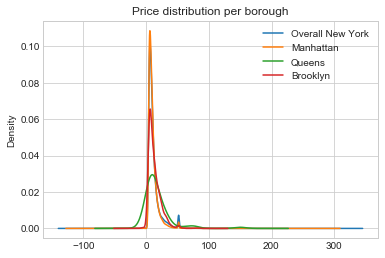

In [106]:
#February
cq1(feb, 'February')

About March:
                    mean         std
borough                             
Bronx          17.839673   17.593338
Brooklyn       14.082999   10.766168
EWR            66.487931   40.081888
Manhattan      11.085224  101.026395
Queens         35.334561   18.138091
Staten Island  30.609647   31.361933
Unknown        12.857963   25.898796
ANOVA:
F_onewayResult(statistic=163.42679709871044, pvalue=1.4113023695110862e-71)


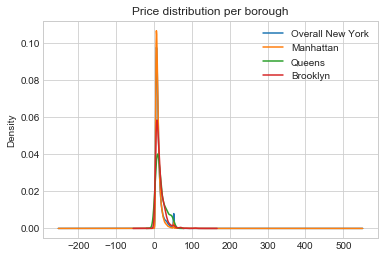

In [107]:
#March
cq1(mar, 'March')

About April:
                    mean        std
borough                            
Bronx          19.653121  17.814430
Brooklyn       14.688985  11.124958
EWR            68.369091  46.545086
Manhattan      11.242216   8.682766
Queens         35.837694  17.861285
Staten Island  42.196456  37.987437
Unknown        13.082496  13.909889
ANOVA:
F_onewayResult(statistic=158.64936623708581, pvalue=1.6510154069574198e-69)


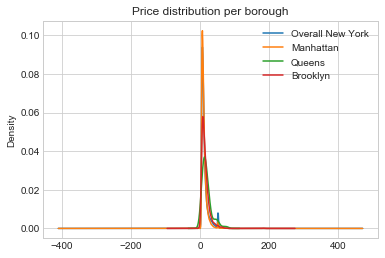

In [108]:
#April
cq1(apr, 'April')

About May:
                    mean        std
borough                            
Bronx          21.334041  19.166704
Brooklyn       15.316807  11.855985
EWR            64.893657  43.296817
Manhattan      11.593538   8.706057
Queens         36.244969  17.614322
Staten Island  46.082065  40.362218
Unknown        13.679099  15.192105
ANOVA:
F_onewayResult(statistic=131.42019016701525, pvalue=1.014541686383013e-57)


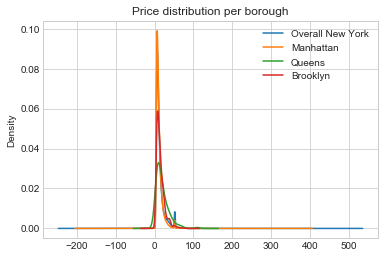

In [109]:
#May
cq1(may, 'May')

About June:
                    mean        std
borough                            
Bronx          21.476512  18.859311
Brooklyn       15.278072  11.960325
EWR            65.760600  41.762509
Manhattan      11.503018   9.048855
Queens         35.995637  17.928864
Staten Island  43.739820  57.177049
Unknown        13.308313  14.194552
ANOVA:
F_onewayResult(statistic=135.09803381560474, pvalue=2.5909262814332358e-59)


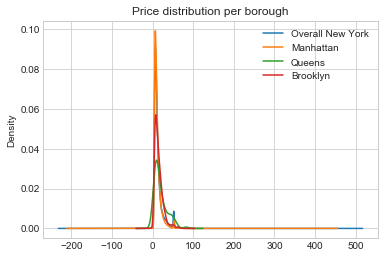

In [110]:
#June
cq1(jun, 'June')

About I Semester 2018:
                    mean        std
borough                            
Bronx          14.442276  15.887462
Brooklyn       13.436999  10.138883
EWR            68.342736  45.456798
Manhattan      10.676578   7.777316
Queens         34.867872  18.563495
Staten Island  20.391954  22.503655
Unknown        12.393549  25.986068
ANOVA:
F_onewayResult(statistic=96.95847291573791, pvalue=8.621806017505248e-43)


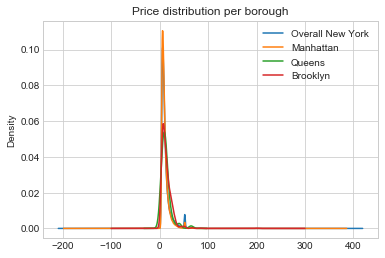

In [111]:
agg = jan[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
d = {'February': feb, 'March': mar, 'April': apr, 'May': may, 'June':jun}
for values in d.values():
    x = values[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
    #we keep just the needed columns
    agg.append(x) #we create the aggregate dataframe appending all the following month to the first

#January to June 2018:
cq1(agg, 'I Semester 2018')

# CRQ 1.2
The same analysis of above with weighted price.

In [46]:
def cq1_weighted(df, str_):
    print('About '+str_+':')
    df2 = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
    t1_f = df2['tpep_pickup_datetime']
    t2_f = df2['tpep_dropoff_datetime']
    time_diff = t2_f-t1_f
    time_diff = time_diff.astype('timedelta64[m]')
    dict_2 = {'time_diff': time_diff, 'borough': df2['Borough'], 'distance': df2['trip_distance'], 'fare amount': df2['fare_amount']}
    datafm2 = pd.DataFrame(dict_2)
    datafm2 = datafm2.dropna(axis = 0)
    datafm2 = datafm2.loc[datafm2['time_diff'] > 0]
    datafm2 = datafm2.loc[datafm2['time_diff'] <= 120]
    grouped_p = datafm2.groupby('borough')
    x = grouped_p['fare amount'].agg([np.mean, np.std])
    print(x)
    sampled = datafm2.sample(100000)
    sampled['p_w'] = sampled['fare amount'] * sampled['time_diff']
    sampled = sampled.groupby('borough')
    f_f1 = sampled.get_group('Manhattan')['p_w']
    f_f1.plot.kde(label = " Manhattan price distribution")
    f_f2 = sampled.get_group('Bronx')['p_w']
    f_f2.plot.kde(label = " Bronx price distribution")
    f_f3 = sampled.get_group('Brooklyn')['p_w']
    f_f3.plot.kde(label = " Beooklyn price distribution")
    f_f4 = sampled.get_group('Queens')['p_w']
    f_f4.plot.kde(label = " Queens price distribution")
    #f_f5 = sampled.get_group('Staten Island')['p_w']
    #f_f5.plot.kde(label = " S.Island price distribution")
    plt.legend();
    
    stat_ = stats.f_oneway(f_f1, f_f2, f_f3, f_f4) #we compute anova
    print('ANOVA:')
    print(stat_)

We have created a new weighed date variable considering the milia.
To plot the variables(fare amount) we chose a fairly large sample representative of the population of interest.
Furthermore, distribution seems to have a chi-square form.
The interpretation of the p-value correctly rejects the null hypothesis, FOR EACH MONTHS, indicating that one or more sample means differ.
We have graphically represented the distributions of prices associated with the borough. Many of them,FOR EACH MONTH, seem to have a chi-square distribution.
We have used  only four Borough(Manhattan, Bronx, Brooklyn, Queens) because sometimes we faced errors while running other zones.

About January:
                    mean        std
borough                            
Bronx          14.442276  15.887462
Brooklyn       13.436999  10.138883
EWR            68.342736  45.456798
Manhattan      10.676578   7.777316
Queens         34.867872  18.563495
Staten Island  20.391954  22.503655
Unknown        12.393549  25.986068
ANOVA:
F_onewayResult(statistic=11025.76158216693, pvalue=0.0)


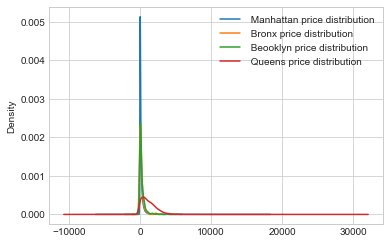

In [47]:
#January
cq1_weighted(jan, 'January')

About February:
                    mean        std
borough                            
Bronx          15.065188  18.838622
Brooklyn       13.429263  10.119737
EWR            57.680494  45.440626
Manhattan      10.769731   7.873718
Queens         34.436355  17.631655
Staten Island  30.004444  33.434611
Unknown        12.284267  13.053520
ANOVA:
F_onewayResult(statistic=9715.576906726505, pvalue=0.0)


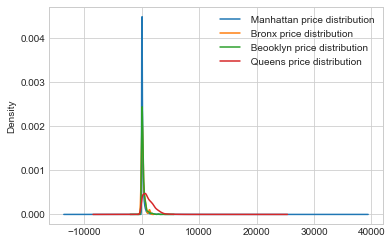

In [114]:
#February
cq1_weighted(feb, 'February')

About March:
                    mean         std
borough                             
Bronx          17.839673   17.593338
Brooklyn       14.082999   10.766168
EWR            66.487931   40.081888
Manhattan      11.085224  101.026395
Queens         35.334561   18.138091
Staten Island  30.609647   31.361933
Unknown        12.857963   25.898796
ANOVA:
F_onewayResult(statistic=9972.417392559713, pvalue=0.0)


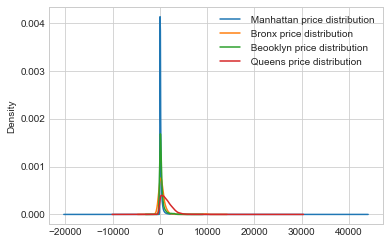

In [115]:
#March
cq1_weighted(mar, 'March')

About April:
                    mean        std
borough                            
Bronx          19.653121  17.814430
Brooklyn       14.688985  11.124958
EWR            68.369091  46.545086
Manhattan      11.242216   8.682766
Queens         35.837694  17.861285
Staten Island  42.196456  37.987437
Unknown        13.082496  13.909889
ANOVA:
F_onewayResult(statistic=11023.23739190887, pvalue=0.0)


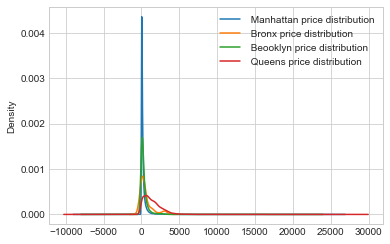

In [116]:
#April
cq1_weighted(apr, 'April')

About May:
                    mean        std
borough                            
Bronx          21.334041  19.166704
Brooklyn       15.316807  11.855985
EWR            64.893657  43.296817
Manhattan      11.593538   8.706057
Queens         36.244969  17.614322
Staten Island  46.082065  40.362218
Unknown        13.679099  15.192105
ANOVA:
F_onewayResult(statistic=10861.958065966652, pvalue=0.0)


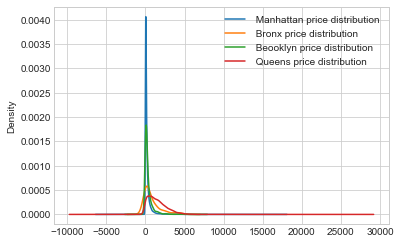

In [117]:
#May
cq1_weighted(may, 'May')

About June:
                    mean        std
borough                            
Bronx          21.476512  18.859311
Brooklyn       15.278072  11.960325
EWR            65.760600  41.762509
Manhattan      11.503018   9.048855
Queens         35.995637  17.928864
Staten Island  43.739820  57.177049
Unknown        13.308313  14.194552
ANOVA:
F_onewayResult(statistic=9997.820096516722, pvalue=0.0)


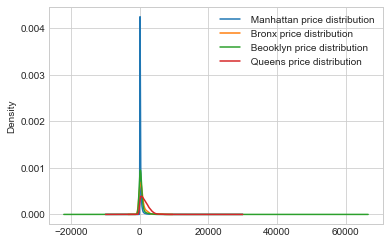

In [118]:
#June
cq1_weighted(jun, 'June')

About I Semester 2018:
                    mean        std
borough                            
Bronx          14.442276  15.887462
Brooklyn       13.436999  10.138883
EWR            68.342736  45.456798
Manhattan      10.676578   7.777316
Queens         34.867872  18.563495
Staten Island  20.391954  22.503655
Unknown        12.393549  25.986068
ANOVA:
F_onewayResult(statistic=9981.552102306749, pvalue=0.0)


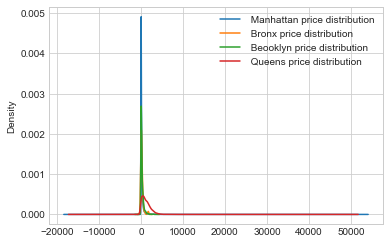

In [119]:
agg = jan[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
d = {'February': feb, 'March': mar, 'April': apr, 'May': may, 'June':jun}
for values in d.values():
    x = values[['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount', 'Borough']]
    #we keep just the needed columns
    agg.append(x) #we create the aggregate dataframe appending all the following month to the first

#January to June 2018:
cq1_weighted(agg, 'I Semester 2018')

# CRQ 2

 Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries. To perform this task we use the library folium. You find some examples of chorophlet maps here and here. The Geojson we use to trace the zones is taxi_zones.json in the Homework's repository.

In [47]:
import json
import folium
from branca.colormap import linear

In [48]:
#we make copy of the dataframe loaded above
jan = January.copy()
feb = February.copy()
mar = March.copy()
apr = April.copy()
may = May.copy()
jun = June.copy()
#we put the created dataframes inside a dictionary
d = {'January': jan, 'February': feb, 'March': mar, 'April': apr, 'May': may, 'June':jun}

In [53]:
def making_maps(df, month):
    df = df[['PULocationID', 'DOLocationID']] #filter dataframes to get just needed columns
    departures = df['PULocationID'].value_counts(dropna=True, sort=True) #count how many values are for each Pick up location
    arrivals = df['DOLocationID'].value_counts(dropna=True, sort=True) #count how many values are for each Drop off location
    ##create a new dataframe with two columns: PULocationID and N_departures(i.e. the result obtained from value_counts)
    departures = departures.rename_axis('PULocationID').reset_index(name='N_departures')
    arrivals = arrivals.rename_axis('DOLocationID').reset_index(name='N_arrivals')

    colormap_dep = linear.YlOrBr_05.scale( #a colormap ranging from the min to the max value of N_deoartures
        departures.N_departures.min(),
        departures.N_departures.max())
    colormap_arr = linear.YlOrBr_05.scale(
        arrivals.N_arrivals.min(),
        arrivals.N_arrivals.max())

#we create a dictionary where the keys are the PULocationID and the value, the n. of departures corresponding to that location
    departures_dict = departures.set_index('PULocationID')['N_departures']
    #when we run this fucntion we experienced, for some months, a Key Value Error for the locations below, so we decided
    #to put them equal to zero. Doing so, we retain few data from the analysis, but we thought that it is a good compromise
    #since the functioning of this function will improve a lot the efficiency of this analysis.
    departures_dict[5] = 0 
    departures_dict[59] = 0
    departures_dict[99] = 0
    departures_dict[103] = 0
    departures_dict[110] = 0
    departures_dict[172] = 0
    departures_dict[199] = 0

    arrivals_dict = arrivals.set_index('DOLocationID')['N_arrivals']
    arrivals_dict[5] = 0
    arrivals_dict[99] = 0
    arrivals_dict[103] = 0
    arrivals_dict[110] = 0
    arrivals_dict[199] = 0
    
    # m is a map with the coordinates of New York
    m = folium.Map([40.7, -74], tiles = 'cartodbpositron', zoom_start=10.5)
    folium.GeoJson(
        taxi_zones,
        style_function=lambda feature: {
            'fillColor': colormap_dep(departures_dict[feature['properties']['LocationID']]), #go inside json e retrive the location
            'color': 'black',
            'weight': 1,
            'dashArray': '5, 5',
            'fillOpacity': 0.9,
        }
    ).add_to(m)
    folium.LayerControl().add_to(m)
    name = 'Departures_'+month+'.html'
    m.save(name) #save the map into an html file

    m = folium.Map([40.7, -74], tiles = 'cartodbpositron', zoom_start=10.5)
    folium.GeoJson(
        taxi_zones,
        style_function=lambda feature: {
            'fillColor': colormap_arr(arrivals_dict[feature['properties']['LocationID']]),
            'color': 'black',
            'weight': 1,
            'dashArray': '5, 5',
            'fillOpacity': 0.9,
        }
    ).add_to(m)
    folium.LayerControl().add_to(m)
    name = 'Arrivals_'+month+'.html'
    m.save(name)

In [54]:
taxi_zones = json.load(open('taxi_zones.json'))
#we did a for loop to build the departures and arrivals maps for each month
for key, value in d.items():
    making_maps(value, key) #recall the fuction defined above

In [55]:
agg = jan[['PULocationID', 'DOLocationID']]
for values in d.values():
    x = values[['PULocationID', 'DOLocationID']] #we keep just the needed columns
    agg.append(x) #we create the aggregate dataframe appending all the following month to the first

making_maps(agg, 'Jan-June_2018') #the the departures and arrivals maps for all the semester

From the map produced with the code above, we can see that the situation is stable during the first semester of 2018. The majoriry of the trips starts and end up in Manhattan, where the number of departures are slightly larger than arrivals.
The boroughs of Brooklyn and Queens (airports excluded) have a number of taxi trips significantly lower than Manhattan, however the number of arrivals are slithly higher than the departures, this trend is the opposite of Manhattan (departures > arrivals) therefore we can guess that same of the trips that starts in Manhattan in the boroughs of Queens and Brooklyn.
However, there are also other zones with high number of pick ups and drop offs otuside Manhattan: LaGuardia Airport and JFK Airport, both in Queens. In these zones the departures are always high, but during the winter months the arrivals tends to decrease and then to go back to high levels during spring.
The bouroughs with the lower level of departures and arrivals are the ones more distant from the city center: Staten Island and EWR. EWR represent the borough of the Newark Airport, this airport serves mostly the New Jersey (a state other than NY, confining with New York city) and is significantly smaller than the two airports in Queens.

Take a look at our maps from the html files inside the directory!